<a href="https://colab.research.google.com/github/SteMarco07/Progetto-TPSIT-annalisi-dataset/blob/main/ProgettoAnalisi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Cariamento dataset

Caricamento del dataset json ad una repository presente su GitHub

In [ ]:
import requests
import matplotlib.pyplot as plt
import numpy as np
import folium
response = requests.get("https://raw.githubusercontent.com/SteMarco07/Progetto-TPSIT-annalisi-dataset/refs/heads/main/Dataset/Accidents.json")
data = response.json()
data

---
Funzione per il conteggio degli argomenti per una determinata chiave

In [5]:
def conteggio(data, chiave):
  argomenti = {}
  for i in data:
    argomento = i[chiave]
    if argomento != "" and argomento != " ":
      if argomento in argomenti:
        argomenti[argomento] += 1
      else:
        argomenti[argomento] = 1
  return argomenti

---
Funzione per la creazione di un sottodizionario ordinato di una dimensione scelta dall'utente

In [6]:
def ordinaTagliaDizionario (dizionario):
  dizionarioOrdinato = dict(sorted(dizionario.items(), key=lambda item: item[1], reverse=True))
  dim = int(input("Inserisci il numero di parametri: "))
  topDizionarioOrdinato = dict(list(dizionarioOrdinato.items())[:dim])
  return topDizionarioOrdinato


#Analisi sulle quantità di elicotteri ed aerei



---


Funzione per il conteggio dei veivoli presenti nel dataset, gli viene passato come parametro la chiave del veivolo e ne ritorna la quantità

In [ ]:
def contaVeivoli (chiave):
  count = 0
  for i in data:
    if chiave in i.keys() and i[chiave]:
      count += 1
  return count



---


Conteggio del numero di schianti avvenuti in elicottero

In [ ]:
numSchiantiElicottero = contaVeivoli('Helicopter')
print(f"Sono presenti {numSchiantiElicottero} elicotteri")

Sono presenti 1122 elicotteri




---


Conteggio del numero di schianti avvenuti in aereo

In [ ]:
numSchiantiAereo = contaVeivoli('Airplane')
print(f"Sono presenti {numSchiantiAereo} aerei")

Sono presenti 3424 aerei


---
Grafico a torta che rappresenta la percentuale di aerei ed elicotteri

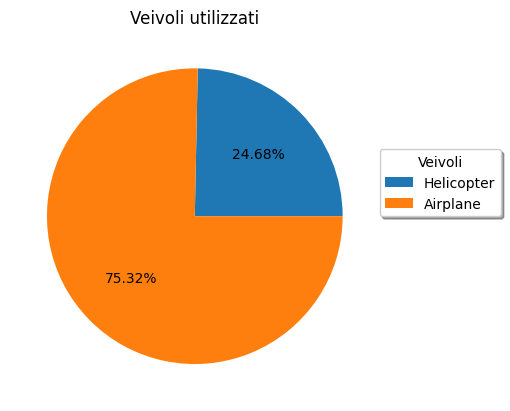

In [ ]:
#Argomenti
labels1 = 'Helicopter', 'Airplane'
#Quantità
sizes1 = [numSchiantiElicottero, numSchiantiAereo]

fig, tortaVeivoli = plt.subplots()
#autopac indica la precisione della prercentuale
tortaVeivoli.pie(sizes1, autopct='%1.2f%%')
tortaVeivoli.set_title('Veivoli utilizzati')

#Legenda del grafico
tortaVeivoli.legend(labels1, loc=(1,0.5),shadow = True, title = 'Veivoli')

plt.show()


#Analisi sui tipi di motori dei veivoli



---


Conteggio delle diverse tipologie di motori

In [ ]:
tipiMotori = {}

for elementi in data:
  motore = elementi['EngineType']
  if motore in tipiMotori:
     tipiMotori[motore] += 1
  else:
    tipiMotori[motore] = 1


for keys,value in tipiMotori.items():
  print(f"{keys}, {value}")




---


Grafico a torta che rappresenta i tipi motori utilizzati dagli aerei o elicotteri

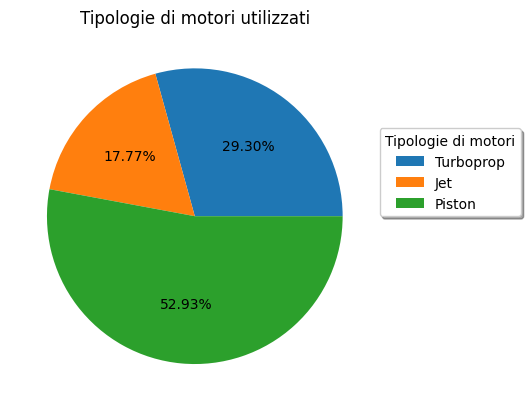

In [ ]:

size2 = list(tipiMotori.values())

fig, tortaMotori = plt.subplots()
tortaMotori.pie(size2, autopct='%1.2f%%')
tortaMotori.set_title('Tipologie di motori utilizzati')
# Aggiungi la legenda
tortaMotori.legend(list(tipiMotori.keys()), loc=(1,0.5),shadow = True, title='Tipologie di motori')

plt.show()

---
Grafico a barre che rappresenta le quantità per i diversi tipi di motori

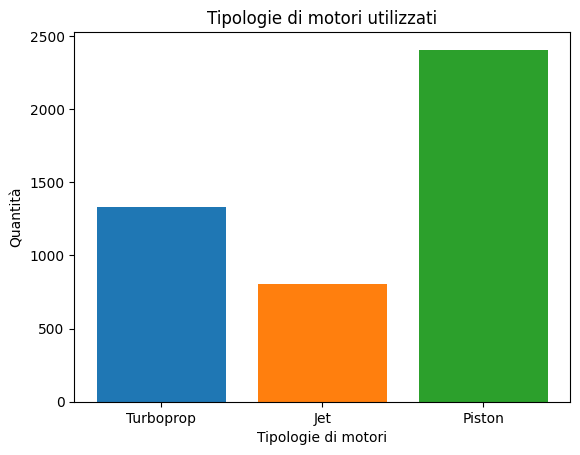

In [ ]:

fig, barreMotori = plt.subplots()

bar_colors = ['tab:blue', 'tab:orange', 'tab:green']

barreMotori.bar(tipiMotori.keys(), size2, color=bar_colors)

barreMotori.set_ylabel('Quantità')
barreMotori.set_xlabel('Tipologie di motori')
barreMotori.set_title('Tipologie di motori utilizzati')

plt.show()

---
Funzione di ricerca che ritorna il valore di una chiave data in un dizionario

In [2]:
def cercaValoreChiave(data, chiave):
  for i in data.keys():
    if i == chiave:
      return data[chiave]
  return None

#Analisi sui modelli dei veivoli

---
Conteggio dei modelli di aerei o elicotteri

In [ ]:
modelli = conteggio(data,"Model")

modelli

---
Creo un nuovo dizionario ordinato in maniera decrescente dei modelli dei veivoli, successivamente ne crea un altro con solo con i primi, il numero è scelto dall'utente

In [ ]:

topModelli = ordinaTagliaDizionario(modelli)
topModelli

---
Grafico che rappresenta la classifica dei modelli presedentemente selezionati

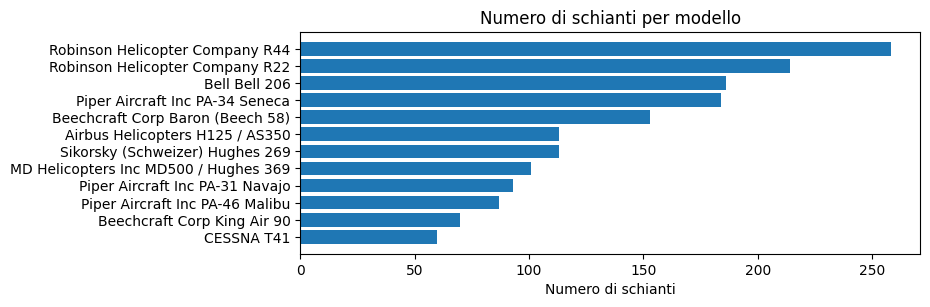

In [ ]:
altezza = (len(topModelli)*12)/50
fig, topModelliBarre = plt.subplots(figsize=(8, altezza))

topModelliChiavi = topModelli.keys()
topModelliValori = topModelli.values()

y_pos = np.arange(len(topModelliChiavi))

topModelliBarre.barh(y_pos, topModelliValori, align='center')
topModelliBarre.set_yticks(y_pos, labels=topModelliChiavi)
topModelliBarre.invert_yaxis()
topModelliBarre.set_xlabel('Numero di schianti')
topModelliBarre.set_title('Numero di schianti per modello')

plt.show()

---
Ricerca di quanti incidenti sono avvenuti con un modello specifico

In [ ]:
modello = input("Inserisci il modello di veivolo che vorresti cercare: ")

ritorno = cercaValoreChiave(modelli,modello)
if ritorno != None:
  print(f"Il modello {modello} è stato coinvolto in {ritorno} schianti")
else:
  print(f"Il modello non è stato trovato")

#Analisi sulle compagnie

---
Conteggio delle compagnie che hanno avuto dei veivoli coinvolti in schianti

In [ ]:
operatori = conteggio(data, 'Operator')
operatori


---
Creo un nuovo dizionario ordinato in maniera decrescente delle compagnie, successivamente ne crea un altro con solo con i primi, il numero è scelto dall'utente

In [ ]:
topOperatori = ordinaTagliaDizionario(operatori)
topOperatori

---
Grafico che rappresenta la classifica dei modelli presedentemente selezionati

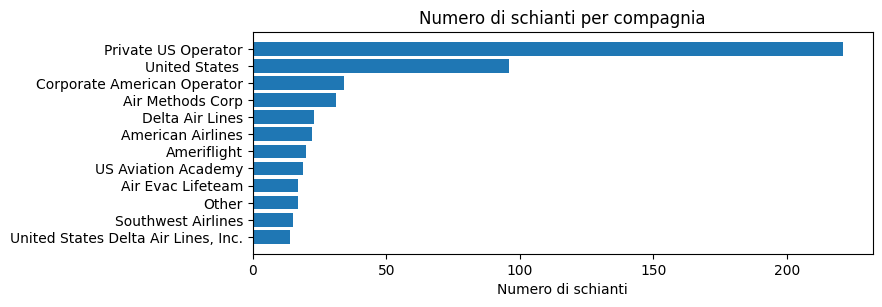

In [ ]:
altezza = (len(topOperatori)*12)/50
fig, topOperatoriBarre = plt.subplots(figsize=(8, altezza))

topOperatoriChiavi = topOperatori.keys()
topOperatoriValori = topOperatori.values()

y_pos = np.arange(len(topOperatoriChiavi))

topOperatoriBarre.barh(y_pos, topOperatoriValori, align='center')
topOperatoriBarre.set_yticks(y_pos, labels=topOperatoriChiavi)
topOperatoriBarre.invert_yaxis()
topOperatoriBarre.set_xlabel('Numero di schianti')
topOperatoriBarre.set_title('Numero di schianti per compagnia')

plt.show()

---
Ricerca di quanti incidenti sono avvenuti a veivoli di una determinata compagnia

In [ ]:
compagnia = input("Inserisci la compagnia di cui vuoi sapere il numero di veivoli coinvolti in schianti: ")

ritorno = cercaValoreChiave(operatori,compagnia)
if ritorno != None:
  print(f"La compagnia {compagnia} ha avuto {ritorno} veivoli coinvolti in schianti")
else:
  print(f"La compagnia non è stata trovata")

Inserisci la compagnia di cui vuoi sapere il numero di veivoli coinvolti in schianti: 12


#Analisi sulle fasi in cui sono avvenutii gli schianti

---
Conteggio delle fasi in cui sono avvenuti degli schianti

In [ ]:
fasi = conteggio(data, 'FlightPhase')
fasi

---
Grafico a torta che rappresenta la percentuale di schianti durante le diverse fasi

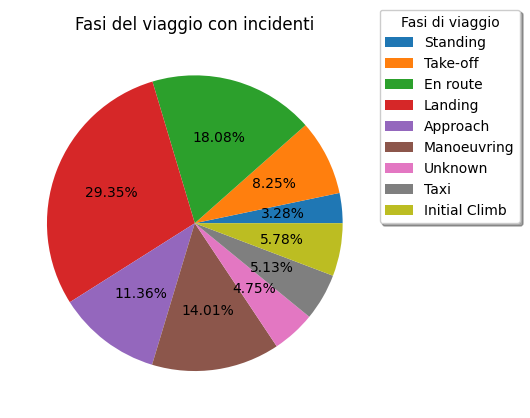

In [19]:
size2 = list(fasi.values())

fig, tortaFasi = plt.subplots()
tortaFasi.pie(size2, autopct='%1.2f%%')
tortaFasi.set_title('Fasi del viaggio con incidenti')
# Aggiungi la legenda
tortaFasi.legend(list(fasi.keys()), loc=(1,0.5),shadow = True, title='Fasi di viaggio')

plt.show()

---
Ricerca di quanti incidenti sono avvenuti a veivoli di una determinata compagnia

In [ ]:
fase = input("Inserisci la fase in cui vuoi sapere il numero di schianti: ")

ritorno = cercaValoreChiave(fasi,fase)
if ritorno != None:
  print(f"Durante la fase {fase} sono avvenuti {ritorno} incidenti")
else:
  print(f"La fase non è stata trovata")

#Analisi sulla gravità degli incidenti

---
Conteggio delle gravità degli incidenti

In [ ]:
nGravita = conteggio(data, 'InjuryLevel')
nGravita

---
Grafico a torta che rappresenta la percentuale di schianti durante le diverse gravità

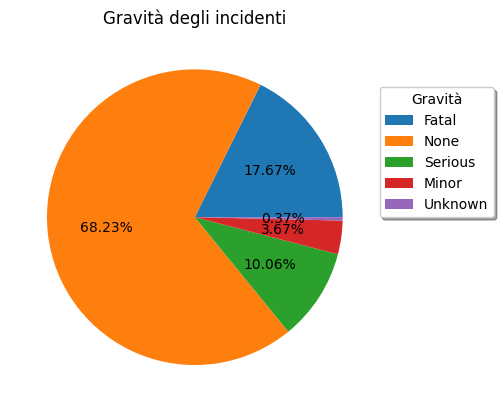

In [ ]:
valori = list(nGravita.values())

fig, tortaGravita = plt.subplots()
tortaGravita.pie(valori, autopct='%1.2f%%')
tortaGravita.set_title('Gravità degli incidenti')
# Aggiungi la legenda
tortaGravita.legend(list(nGravita.keys()), loc=(1,0.5),shadow = True, title='Gravità')

plt.show()

---
Ricerca di quanti incidenti hanno avuto una certa gravità

In [ ]:
gravita = input("Inserisci la fase in cui vuoi sapere il numero di schianti: ")

ritorno = cercaValoreChiave(nGravita,gravita)
if ritorno != None:
  print(f"Il numero di incidenti con gravità {gravita} sono {ritorno}")
else:
  print(f"La gravita non è stata trovata")

#Analisi riguardante gli anni in cui sono avvenuti incidenti (dal 2008 al 2020)

In [ ]:
anni = conteggio(data, 'Year')
anni

---
Grafico che rappresenta la classifica degli incidenti accadune negli anni

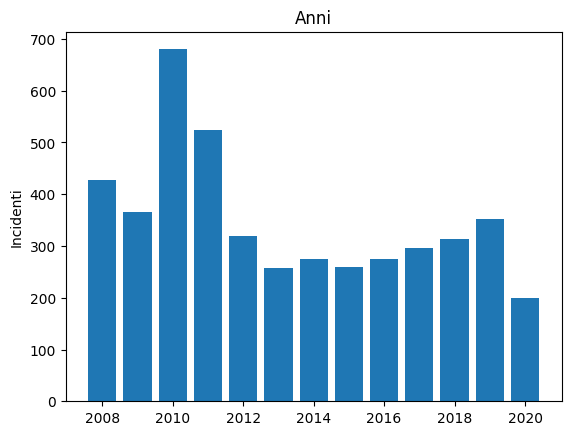

In [15]:
fig, anniBarre = plt.subplots()

anniChiavi = anni.keys()
anniValori = anni.values()

anniBarre.bar(anniChiavi, anniValori)

anniBarre.set_ylabel('Incidenti')
anniBarre.set_title('Anni')

plt.show()

---
Ricerca quanti incidenti sono avvenuti in un determinato anno

In [14]:
anno = int(input("Inserisci l'anno in cui vuoi visualizzare quanti veivoli sono stati coinvolti coinvolti in schianti (dal 2008 al 2020): "))

ritorno = cercaValoreChiave(anni,anno)
if ritorno != None:
  print(f"Durante l'anno {anno} sono avvenuti {ritorno} incidenti")
else:
  print(f"L'anno non è stata trovata")

Inserisci l'anno in cui vuoi visualizzare quanti veivoli sono stati coinvolti coinvolti in schianti (dal 2008 al 2020): 2009
Durante l'anno 2009 sono avvenuti 365 incidenti


#Analisi sui loughi di **schianto**

---
Funzione che passato il nome di una città ritorna le coordinate se trovate

In [ ]:
from geopy.geocoders import Nominatim

def get_coordinates(city_name):
    geolocator = Nominatim(user_agent="city_coordinates_app")
    location = geolocator.geocode(city_name)

    if location:
        return (location.latitude, location.longitude)
    else:
        return None

# Esempio di utilizzo:
city_name = input("Inserisci il nome della città: ")
coordinates = get_coordinates(city_name)

if coordinates:
    print(f"Le coordinate di {city_name} sono: Latitudine = {coordinates[0]}, Longitudine = {coordinates[1]}")
else:
    print(f"Impossibile trovare le coordinate per la città {city_name}.")


Inserisci il nome della città: Brescia
Le coordinate di Brescia sono: Latitudine = 45.77958045, Longitudine = 10.4258729694612


---
Crea una lista contenente i nomi delle città, rimuovendo le opzioni non valide

In [ ]:
import re

def validate_string(s):
    words = s.split()

    # Verifica se la stringa contiene numeri
    if re.search(r'\d', s):
        return False

    # Verifica se la stringa contiene determinate parole
    if "airport" in words and "near" in words and "Airport" in words and "Near" in words :
        return False

    return True

citta = []
for i in data:
 argomento = i["Location"]
 if argomento != "" and argomento != " " and validate_string(argomento):
  citta.append(argomento)

citta = list(set(citta))
ptint(print(len(citta)))
citta





1287


---
Conteggio del numero degli incidenti per ogni città

In [ ]:
incidentiPerCitta = conteggio(data,"Location")
incidentiPerCitta

---
Crea la mappa dei luoghi degli incidenti avvenuti principalmente negli Stati Uniti d'America, indicando il luogo, numero di incidenti, indicato anche visivamente

In [ ]:
coordinate = []
for city in citta:
    coord = get_coordinates(city)
    print(len(coordinate))
    if coord != None:
      dato = {}
      dato["citta"] = city
      dato["coordinate"] = coord
      dato["incidenti"] = incidentiPerCitta[city]
      print(dato)
      coordinate.append(dato)

coordinate


---
Mappa che disegna la locazione di diversi incidenti

In [ ]:
def getColore (valore):
  if valore == 1:
    return "blue"
  elif valore < 3:
    return "green"
  elif valore  < 5:
    return "orange"
  elif valore >= 5:
    return "red"


mappa = folium.Map(location=[39.8283, -98.5795], zoom_start=5)

blue_group = folium.FeatureGroup(name="Blue (valore = 1)").add_to(mappa)
green_group = folium.FeatureGroup(name="Green (valore < 3)").add_to(mappa)
orange_group = folium.FeatureGroup(name="Orange (valore < 5)").add_to(mappa)
red_group = folium.FeatureGroup(name="Red (valore >= 5)").add_to(mappa)

# Aggiungi marker ai gruppi
for coord in coordinate:
    color = getColore(coord["incidenti"])
    popup_text = coord["citta"] + " - Numero di incidenti: " + str(coord["incidenti"])

    if color == "blue":
        folium.Marker(
            location=coord["coordinate"],
            icon=folium.Icon(color=color),
            popup=popup_text
        ).add_to(blue_group)
    elif color == "green":
        folium.Marker(
            location=coord["coordinate"],
            icon=folium.Icon(color=color),
            popup=popup_text
        ).add_to(green_group)
    elif color == "orange":
        folium.Marker(
            location=coord["coordinate"],
            icon=folium.Icon(color=color),
            popup=popup_text
        ).add_to(orange_group)
    elif color == "red":
        folium.Marker(
            location=coord["coordinate"],
            icon=folium.Icon(color=color),
            popup=popup_text
        ).add_to(red_group)

# Aggiungi LayerControl alla mappa
folium.LayerControl().add_to(mappa)

mappa.save("mappa.html")
mappa